In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib

In [50]:
df=pd.read_csv('FMCG.csv')
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40


In [51]:
df.shape

(190757, 14)

In [52]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [53]:
df.tail()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40
190756,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-South,Single,1.91,0,5,82,125,8


In [54]:
df.columns

Index(['date', 'sku', 'brand', 'segment', 'category', 'channel', 'region',
       'pack_type', 'price_unit', 'promotion_flag', 'delivery_days',
       'stock_available', 'delivered_qty', 'units_sold'],
      dtype='object')

In [55]:
df.dtypes

date                object
sku                 object
brand               object
segment             object
category            object
channel             object
region              object
pack_type           object
price_unit         float64
promotion_flag       int64
delivery_days        int64
stock_available      int64
delivered_qty        int64
units_sold           int64
dtype: object

In [56]:
df.isna().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

In [57]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,5.251979,0.149200,3.004860,157.697652,179.333655,19.919709
std,2.166705,0.356287,1.414626,52.736104,40.037475,11.770077
min,1.500000,0.000000,1.000000,-12.000000,-11.000000,-25.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


In [58]:
df['sku'].unique()

array(['MI-006', 'MI-026', 'YO-029', 'YO-005', 'YO-012', 'YO-014',
       'YO-001', 'RE-004', 'RE-007', 'RE-015', 'MI-023', 'JU-021',
       'YO-009', 'SN-027', 'YO-003', 'MI-022', 'YO-016', 'RE-025',
       'SN-010', 'RE-017', 'SN-013', 'YO-020', 'SN-019', 'MI-002',
       'MI-011', 'YO-024', 'MI-008', 'SN-028', 'YO-018', 'SN-030'],
      dtype=object)

In [59]:
len(df['sku'].unique())

30

In [60]:
df['brand'].unique()

array(['MiBrand1', 'MiBrand4', 'YoBrand4', 'YoBrand2', 'YoBrand1',
       'YoBrand3', 'ReBrand1', 'ReBrand4', 'MiBrand3', 'JuBrand3',
       'SnBrand2', 'ReBrand2', 'SnBrand3', 'MiBrand2'], dtype=object)

In [61]:
df['category'].unique()

array(['Milk', 'Yogurt', 'ReadyMeal', 'Juice', 'SnackBar'], dtype=object)

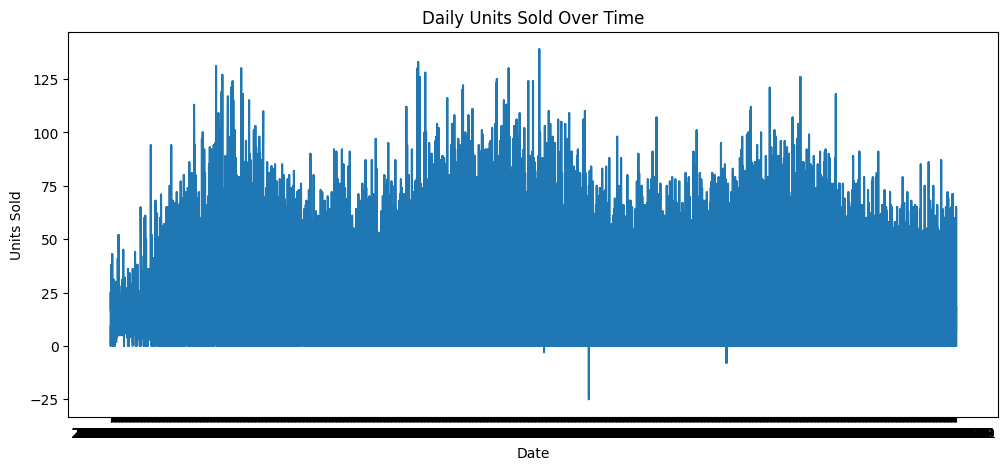

In [62]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['units_sold'])
plt.title("Daily Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

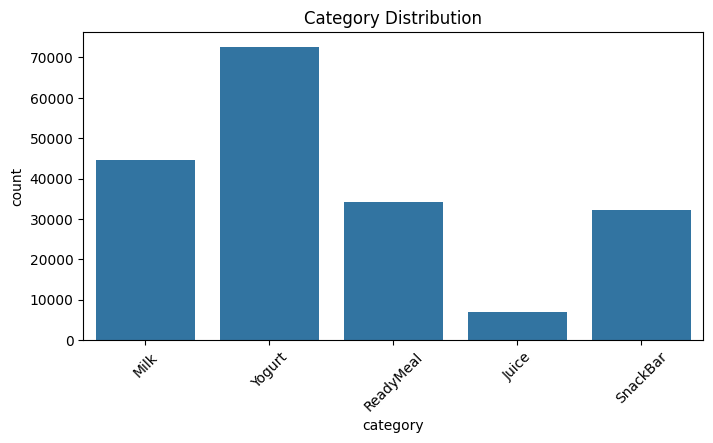

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='category')
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()


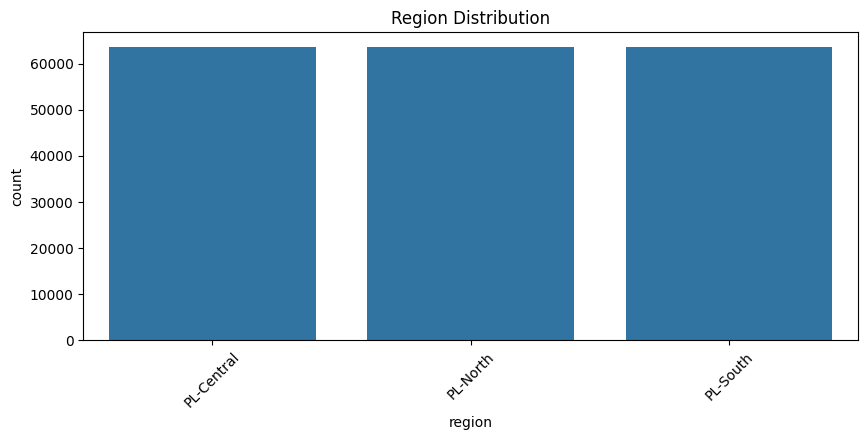

In [64]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='region')
plt.title("Region Distribution")
plt.xticks(rotation=45)
plt.show()


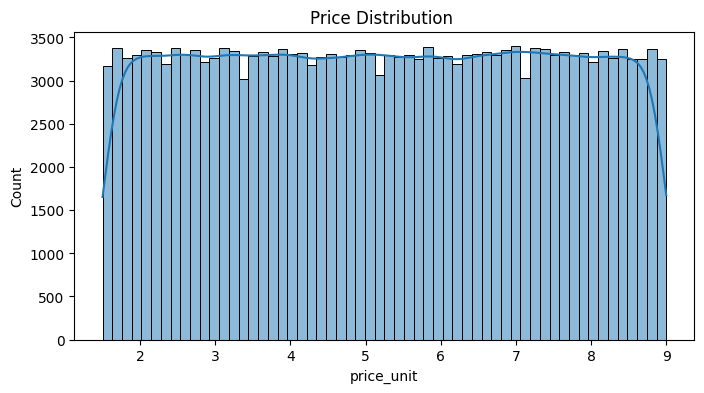

In [65]:
plt.figure(figsize=(8,4))
sns.histplot(df['price_unit'], kde=True)
plt.title("Price Distribution ")
plt.show()


In [66]:
#Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

In [67]:
#Sort by sku and date 
df = df.sort_values(["sku", "date"])

In [68]:
# Lag features
df["lag_1"] = df.groupby("sku")["units_sold"].shift(1)
df["lag_7"] = df.groupby("sku")["units_sold"].shift(7)

# Rolling features
df["rolling_7"] = (df.groupby("sku")["units_sold"].shift(1).rolling(7).mean())

df["rolling_30"] = ( df.groupby("sku")["units_sold"].shift(1) .rolling(30) .mean())

# Remove NaNs created by lagging
df = df.dropna()

In [69]:
#Feature Engineering(Create Time Features)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)

In [70]:
df[["sku", "date", "lag_1", "lag_7"]].head(10)

,sku,date,lag_1,lag_7
8905,JU-021,2022-07-14,16.0,21.0
8989,JU-021,2022-07-15,29.0,15.0
8990,JU-021,2022-07-15,17.0,28.0
8991,JU-021,2022-07-15,27.0,48.0
8992,JU-021,2022-07-15,29.0,20.0
8993,JU-021,2022-07-15,17.0,10.0
8994,JU-021,2022-07-15,16.0,16.0
8995,JU-021,2022-07-15,13.0,29.0
8996,JU-021,2022-07-15,19.0,17.0
8997,JU-021,2022-07-15,20.0,27.0


In [71]:
#Encoding
from sklearn.preprocessing import LabelEncoder
cat_cols = ['sku', 'brand', 'category', 'segment', 'channel', 'region', 'pack_type']
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [72]:
#save Encoders
#joblib.dump(encoders,"encoders.pkl")

In [73]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,lag_1,lag_7,rolling_7,rolling_30,year,month,week,day,weekday,is_weekend
8905,2022-07-14,0,0,0,0,1,2,0,1.96,0,...,16.0,21.0,22.571429,21.833333,2022,7,28,14,3,0
8989,2022-07-15,0,0,0,0,2,0,1,4.14,0,...,29.0,15.0,23.714286,21.900000,2022,7,28,15,4,0
8990,2022-07-15,0,0,0,0,2,1,1,7.76,0,...,17.0,28.0,24.000000,20.466667,2022,7,28,15,4,0
8991,2022-07-15,0,0,0,0,2,2,0,4.85,0,...,27.0,48.0,23.857143,20.566667,2022,7,28,15,4,0
8992,2022-07-15,0,0,0,0,0,0,1,7.16,0,...,29.0,20.0,21.142857,19.766667,2022,7,28,15,4,0


In [74]:
df.dtypes

date               datetime64[ns]
sku                         int32
brand                       int32
segment                     int32
category                    int32
channel                     int32
region                      int32
pack_type                   int32
price_unit                float64
promotion_flag              int64
delivery_days               int64
stock_available             int64
delivered_qty               int64
units_sold                  int64
lag_1                     float64
lag_7                     float64
rolling_7                 float64
rolling_30                float64
year                        int32
month                       int32
week                       UInt32
day                         int32
weekday                     int32
is_weekend                  int32
dtype: object

In [75]:
#Duplicate Check
df.duplicated().sum()

0

In [76]:
df[['price_unit','stock_available','delivered_qty','units_sold','delivery_days']].describe()

,price_unit,stock_available,delivered_qty,units_sold,delivery_days
count,189857.000000,189857.000000,189857.000000,189857.000000,189857.000000
mean,5.252287,157.695155,179.333951,19.936178,3.004751
std,2.166551,52.732847,40.031192,11.778294,1.414578
min,1.500000,-12.000000,-11.000000,-25.000000,1.000000
25%,3.380000,124.000000,152.000000,12.000000,2.000000
50%,5.250000,155.000000,179.000000,18.000000,3.000000
75%,7.130000,192.000000,206.000000,25.000000,4.000000
max,9.000000,405.000000,366.000000,139.000000,5.000000


In [77]:
(df[['stock_available','delivered_qty','units_sold','delivery_days','price_unit']] < 0).sum()

stock_available    3
delivered_qty      3
units_sold         3
delivery_days      0
price_unit         0
dtype: int64

In [78]:
df = df[
    (df['stock_available'] >= 0) &
    (df['delivered_qty'] >= 0) &
    (df['units_sold'] >= 0)
]

In [79]:
(df[['stock_available','delivered_qty','units_sold']] < 0).sum()

stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

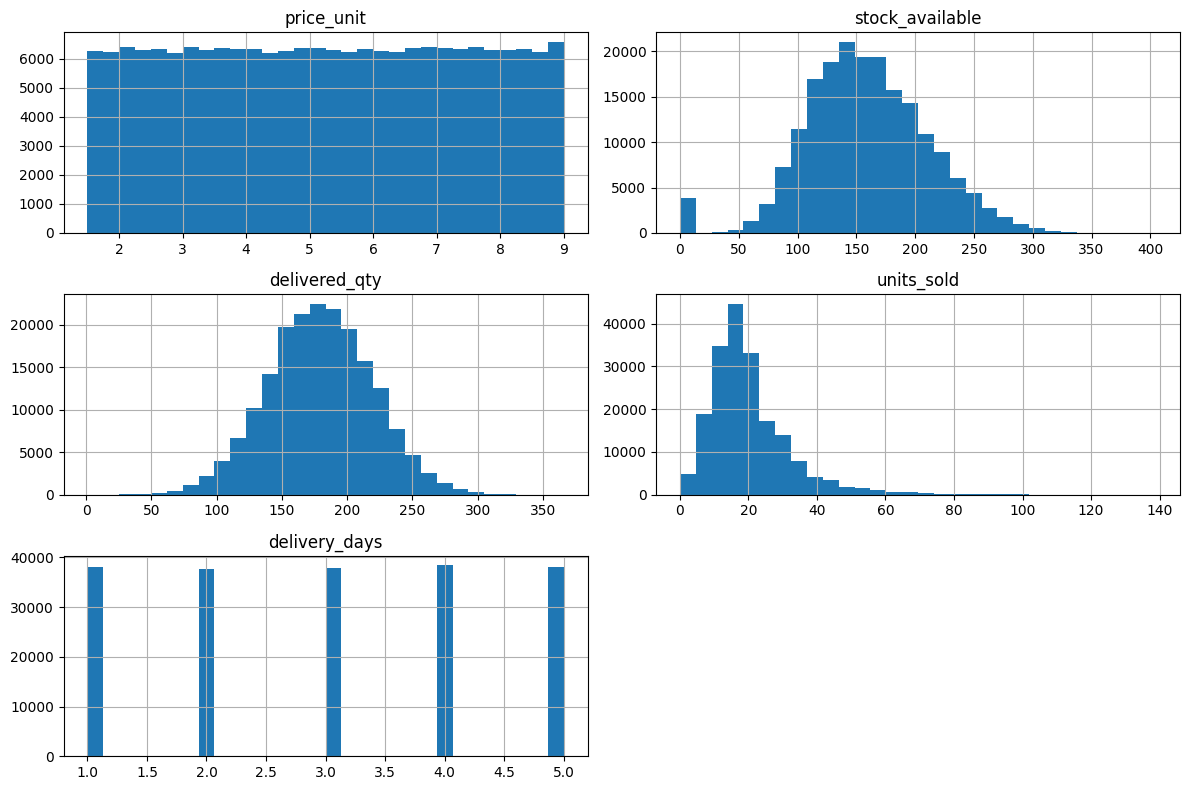

In [80]:
numeric_cols = ['price_unit', 'stock_available', 'delivered_qty', 'units_sold', 'delivery_days']

df[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


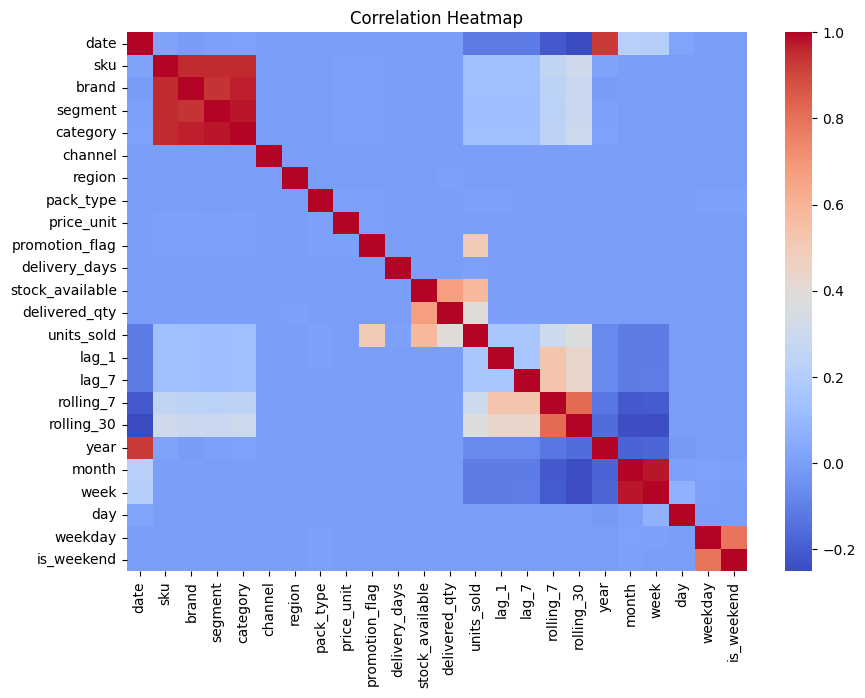

In [81]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [82]:
df[['delivered_qty','units_sold']].corr()

,delivered_qty,units_sold
delivered_qty,1.000000,0.389229
units_sold,0.389229,1.000000


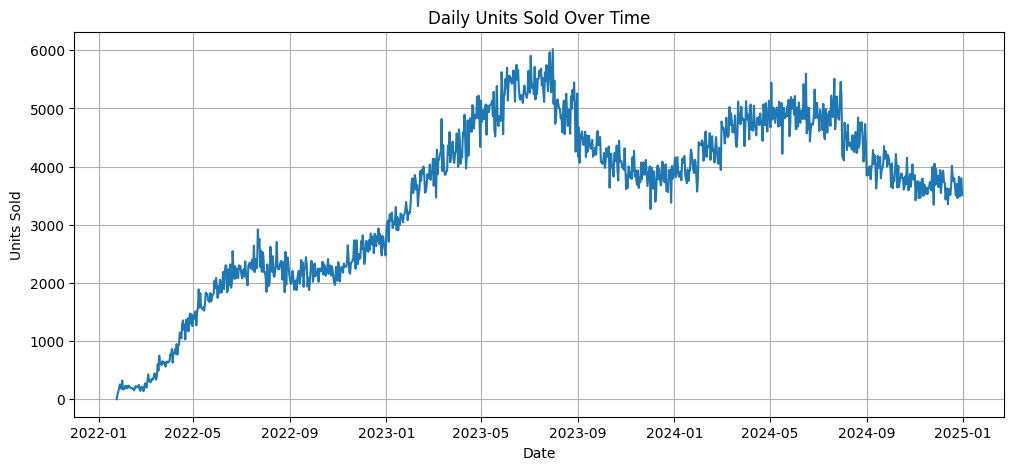

In [83]:
df_daily = df.groupby("date")["units_sold"].sum().reset_index()
plt.figure(figsize=(12,5))
plt.plot(df_daily["date"], df_daily["units_sold"])
plt.title("Daily Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

C:\Users\aswat\AppData\Local\Temp\ipykernel_15088\3668692278.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="category", y="units_sold", ci=None)


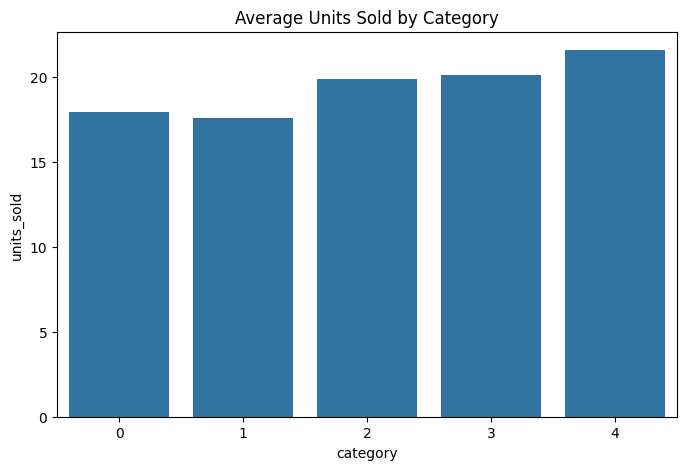

In [84]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="category", y="units_sold", ci=None)
plt.title("Average Units Sold by Category")
plt.show()

C:\Users\aswat\AppData\Local\Temp\ipykernel_15088\3484892859.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="region", y="units_sold", ci=None)


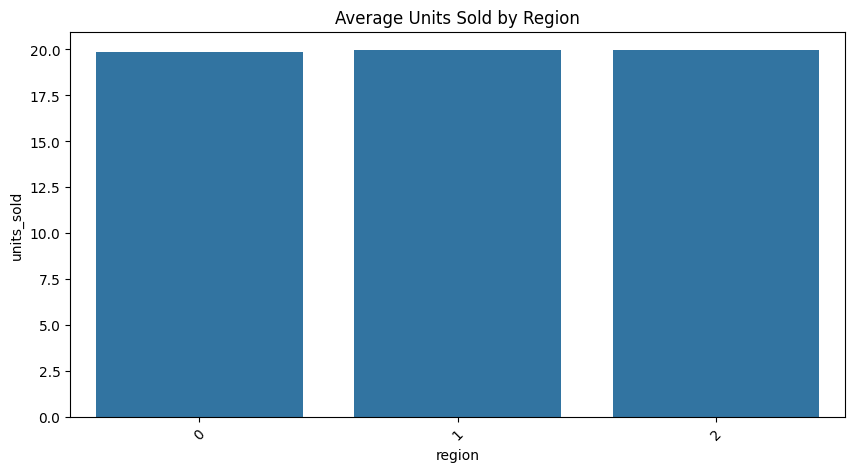

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="region", y="units_sold", ci=None)
plt.title("Average Units Sold by Region")
plt.xticks(rotation=45)
plt.show()

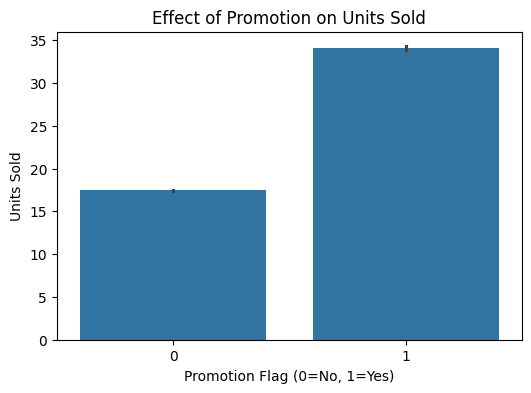

In [86]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="promotion_flag", y="units_sold")
plt.title("Effect of Promotion on Units Sold")
plt.xlabel("Promotion Flag (0=No, 1=Yes)")
plt.ylabel("Units Sold")
plt.show()

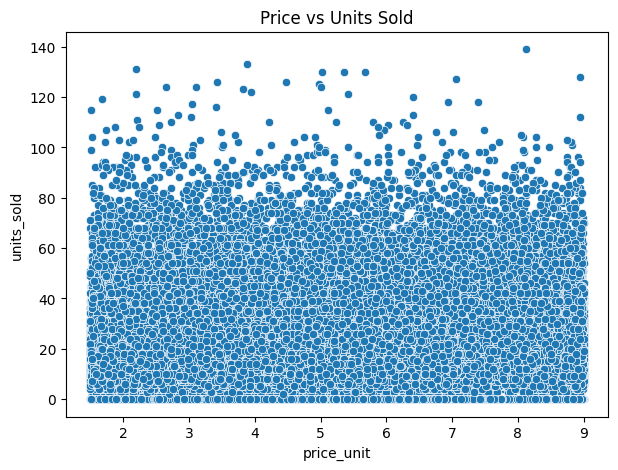

In [87]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="price_unit", y="units_sold")
plt.title("Price vs Units Sold")
plt.show()


C:\Users\aswat\AppData\Local\Temp\ipykernel_15088\3008585629.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="channel", y="units_sold", ci=None)


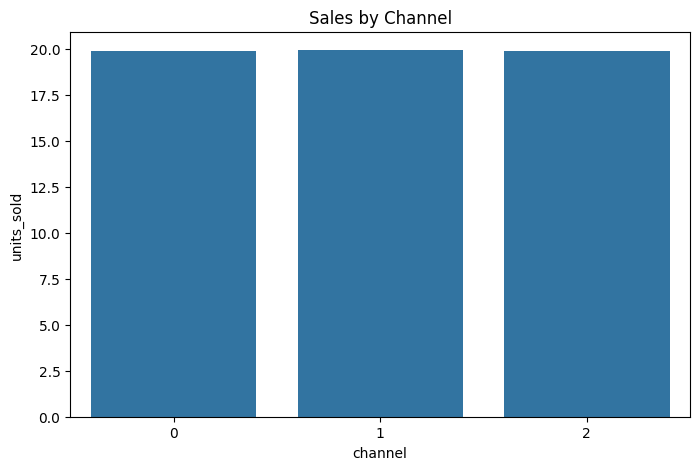

In [88]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel", y="units_sold", ci=None)
plt.title("Sales by Channel")
plt.show()

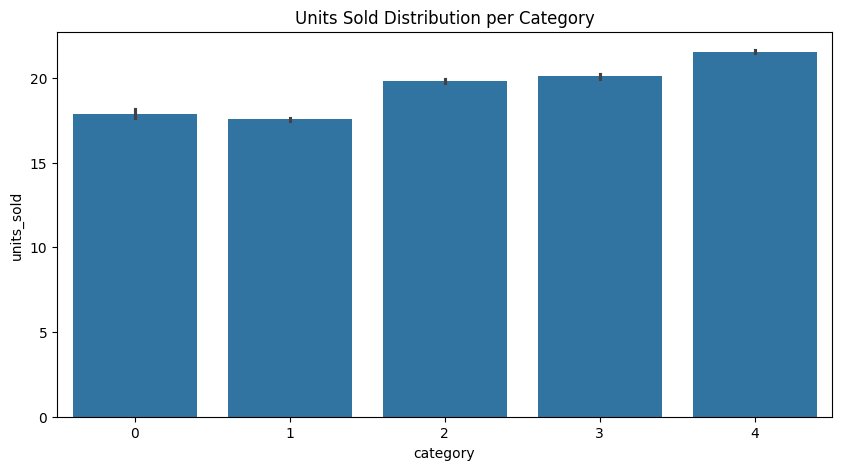

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="category", y="units_sold")
plt.title("Units Sold Distribution per Category")
plt.show()

In [90]:
features = [
    "sku", "brand", "segment", "category", "channel",
    "region", "pack_type", "price_unit", "promotion_flag",
    "delivery_days", "stock_available", "year", "month",
    "week", "day", "weekday", "is_weekend"
]

In [91]:
X = df[features]
y = df["units_sold"]

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [94]:
model = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_split=5,random_state=42,n_jobs=-1)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [95]:
y_pred = model.predict(X_test)
y_pred

array([11.71765079,  7.53581506, 15.37711379, ..., 34.49965115,
       27.54516415, 16.67287422])

In [96]:
print("Training complete.")

Training complete.


In [97]:
#joblib.dump(model, "model.pkl")

In [98]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R² Score: 0.7738871596419741
RMSE: 32.171508336550325
MAE: 3.881484683460666


In [99]:
pred_df = pd.DataFrame({'actual_units_sold': y_test,'predicted_units_sold': y_pred})
pred_df.head()

,actual_units_sold,predicted_units_sold
231,12,11.717651
8324,6,7.535815
20748,20,15.377114
94920,11,16.743322
181410,12,12.007585


In [100]:
# Safety Stock
demand_std = df['units_sold'].std()      # how much daily demand fluctuates
safety_stock = demand_std * 1.65         # 95% service level buffer
print("Safety Stock:", safety_stock)

Safety Stock: 19.43311112609483


In [105]:
#Build inventory dataframe from test set rows
inv_df = X_test[['sku', 'delivery_days']].copy()
inv_df['actual_units_sold'] = y_test.values
inv_df['predicted_units_sold'] = y_pred

In [106]:
#Reorder Point (ROP)
inv_df['reorder_point'] = (inv_df['predicted_units_sold'] * inv_df['delivery_days'] + safety_stock)

In [107]:
#Recommended Inventory Level
inv_df['recommended_inventory'] = (inv_df['predicted_units_sold'] + safety_stock)

In [108]:
inv_df.head()

,sku,delivery_days,actual_units_sold,predicted_units_sold,reorder_point,recommended_inventory
231,2,1,12,11.717651,31.150762,31.150762
8324,8,2,6,7.535815,34.504741,26.968926
20748,19,1,20,15.377114,34.810225,34.810225
94920,21,1,11,16.743322,36.176433,36.176433
181410,4,4,12,12.007585,67.463453,31.440697
